# Introduction to Artificial Intelligence - Homework05
- NETID:
- Name:

This assignment covers the following topics:
- Classification
- Regression
- Using sklearn

Complete all sections. Some questions will require written answers, while others will involve coding. Be sure to run your code cells to verify your solutions.

In this homework we're going to explore some different linear classifiers and regression tools using a few of the common machine learning packages. We're going to start simple and then build up to more complicated problems.

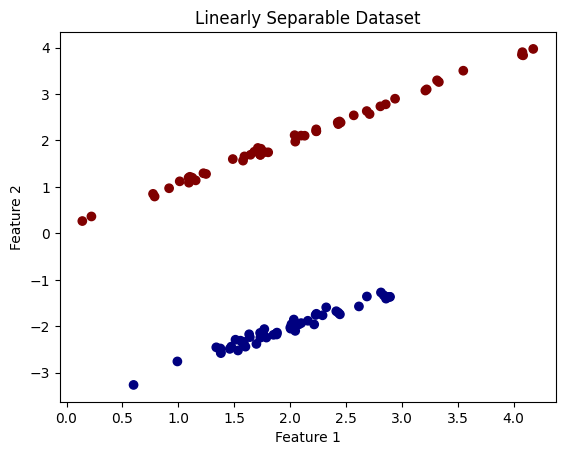

In [110]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Using the code snippet above, we can generate a simple linearly seperable dataset automatically for us. We can then try and use 3 linear classifiers to seperate the data. We are going to test Naive Bayes, the Perceptron, and a linear SVM.

**1.) Where indicated in the following code, instantiate the three linear classifiers, fit the training set and then predict the test set**

Naive Bayes Accuracy on Linear: 1.00
Perceptron Accuracy on Linear: 1.00
Linear SVM Accuracy on Linear: 1.00


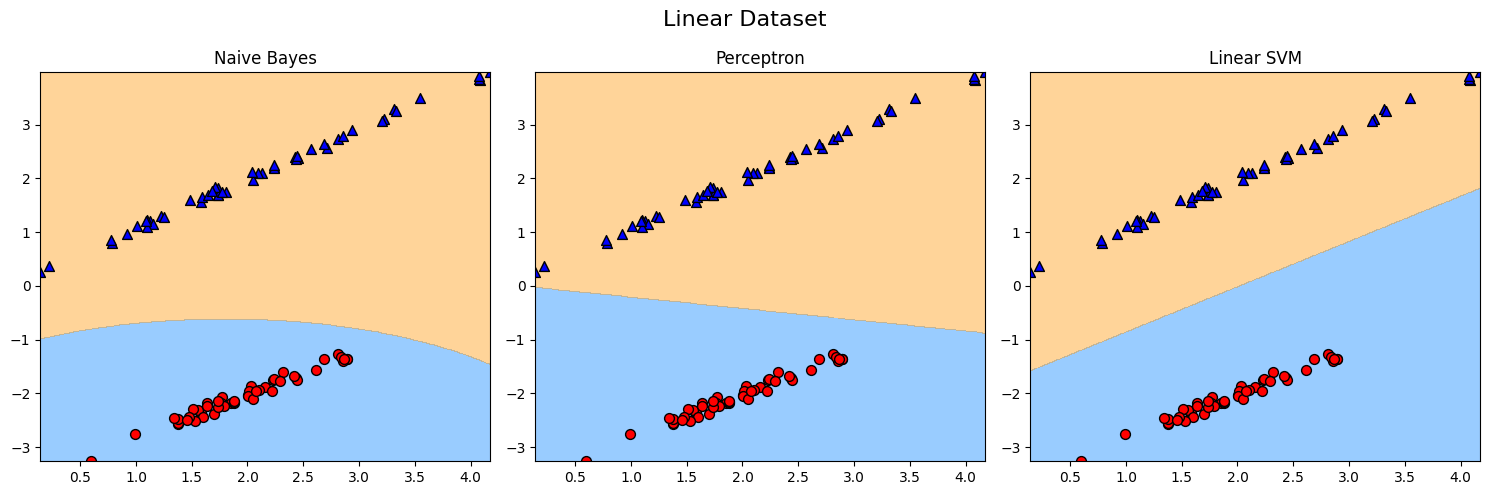

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Plot decision boundary for each classifier
def plot_decision_boundary(clf, X, y, ax):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict class for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    ax.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], alpha=0.4, cmap='jet')  # Two levels for binary classification

    # Plot points for each class with different markers
    markers = ['o', '^', '*']  # Define different markers (e.g., 'o' for class 0, 's' for class 1)
    colors = ['red', 'blue', 'green']
    
    for idx, class_value in enumerate(np.unique(y)):
        ax.scatter(X[y == class_value, 0], X[y == class_value, 1],
                   c=colors[idx], marker=markers[idx], label=f'Class {class_value}',
                   edgecolor='k', s=50)

    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())

# Function to fit classifiers, show accuracy and plot decision boundaries
def fit_and_plot(X, y, dataset_name, classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'{dataset_name} Dataset', fontsize=16)
    
    for idx, (name, clf) in enumerate(classifiers.items()):
        #TODO: Fit the classifier
        
        #TODO: Make predictions
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Accuracy on {dataset_name}: {accuracy:.2f}')
        
        # Plot decision boundary
        axs[idx].set_title(name)
        plot_decision_boundary(clf, X, y, axs[idx])
    
    plt.tight_layout()
    plt.show()

# Create classifiers
classifiers = {
    'Naive Bayes': None, #TODO: Create a Naive Bayes classifier
    'Perceptron': None, #TODO: Create a Perceptron classifier
    'Linear SVM': None #TODO: Create a Linear SVM classifier
}

# Generate a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

fit_and_plot(X, y, "Linear", classifiers)

Perhaps unsurprisingly, our classifiers work very well on nice linearly seperable data. Unforutantely this is rarely the case in the real world. We can still use our classifiers on non-linear data though! They will just be bad. The code cell below runs our three classifiers on trickier datasets, make_moons and make_circles.

Naive Bayes Accuracy on Moons: 0.87
Perceptron Accuracy on Moons: 0.87
Linear SVM Accuracy on Moons: 0.87


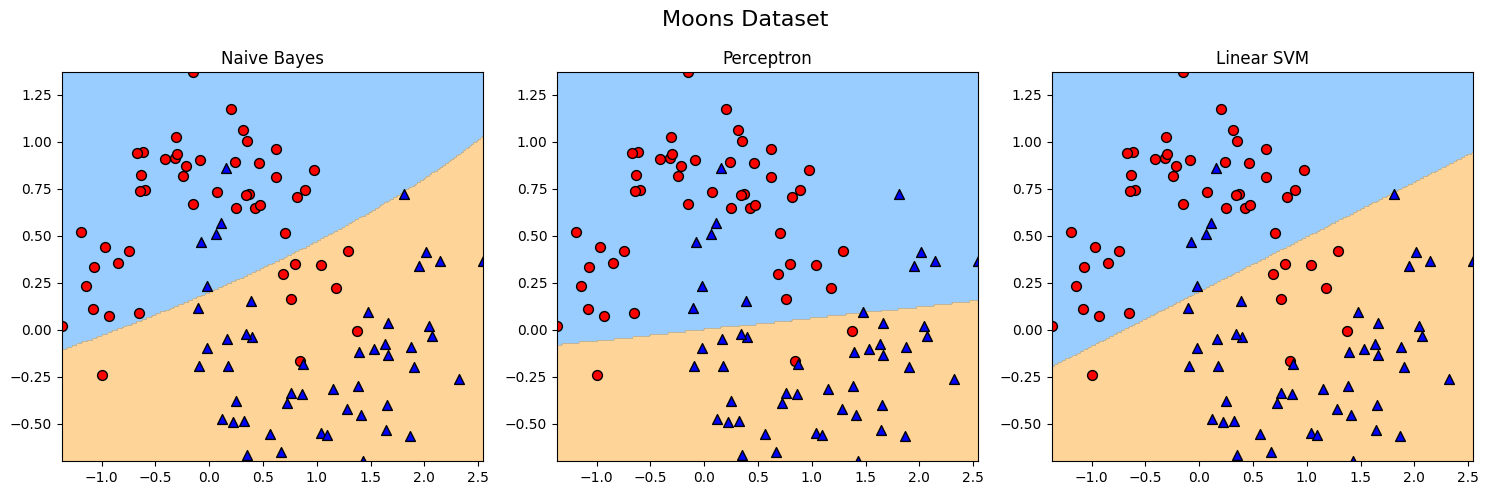

Naive Bayes Accuracy on Circles: 0.97
Perceptron Accuracy on Circles: 0.43
Linear SVM Accuracy on Circles: 0.33


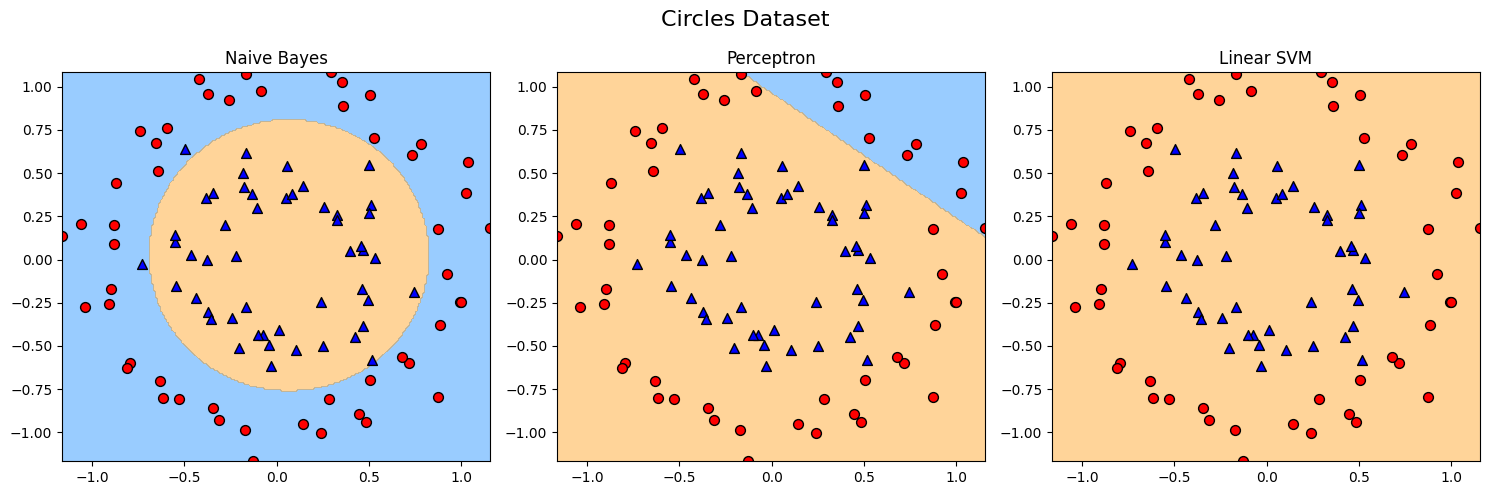

In [112]:
from sklearn.datasets import make_moons, make_circles

# Generate and fit to make_moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=42)
fit_and_plot(X_moons, y_moons, "Moons", classifiers)

# Generate and fit to make_circles dataset
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
fit_and_plot(X_circles, y_circles, "Circles", classifiers)

Outside of Naive Bayes, we don't do so hot. As we saw in class though, SVMs can go beyond just linearly seperable data using the kernel trick! The kernel trick in Support Vector Machines (SVMs) is a technique that allows SVMs to efficiently handle non-linearly separable data by implicitly mapping the input data into a higher-dimensional space without explicitly calculating the transformation. This is done using a kernel function, which computes the dot product of the data points in this high-dimensional space directly from their original features. There are three main kernels you may see

1. The Linear Kernel
2. The Polynomial Kernel
3. The Radial Basis Function (RBF) Kernel

The RBF kernel is the one that gets used most often in practice and is very powerful!

**2.) In the code below create three SVMs, one with each of the three kernels, and try to classify the trickier data sets again!**

Linear SVM Accuracy on Moons: 0.87
Polynomial SVM Accuracy on Moons: 0.97
RBF SVM Accuracy on Moons: 0.97


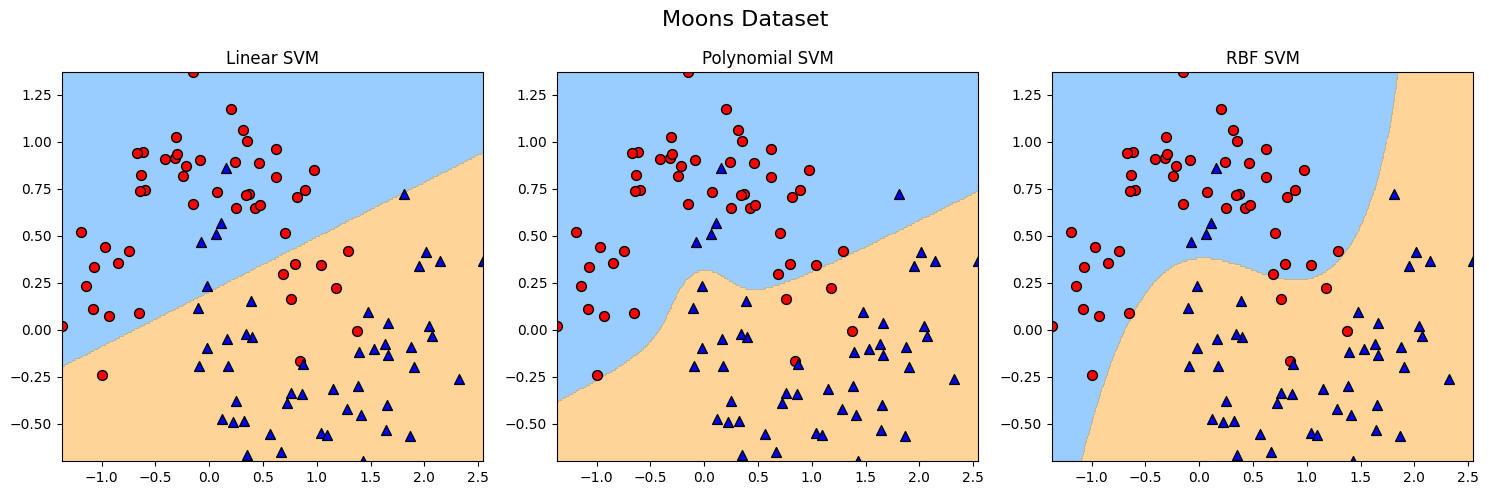

Linear SVM Accuracy on Circles: 0.33
Polynomial SVM Accuracy on Circles: 0.33
RBF SVM Accuracy on Circles: 1.00


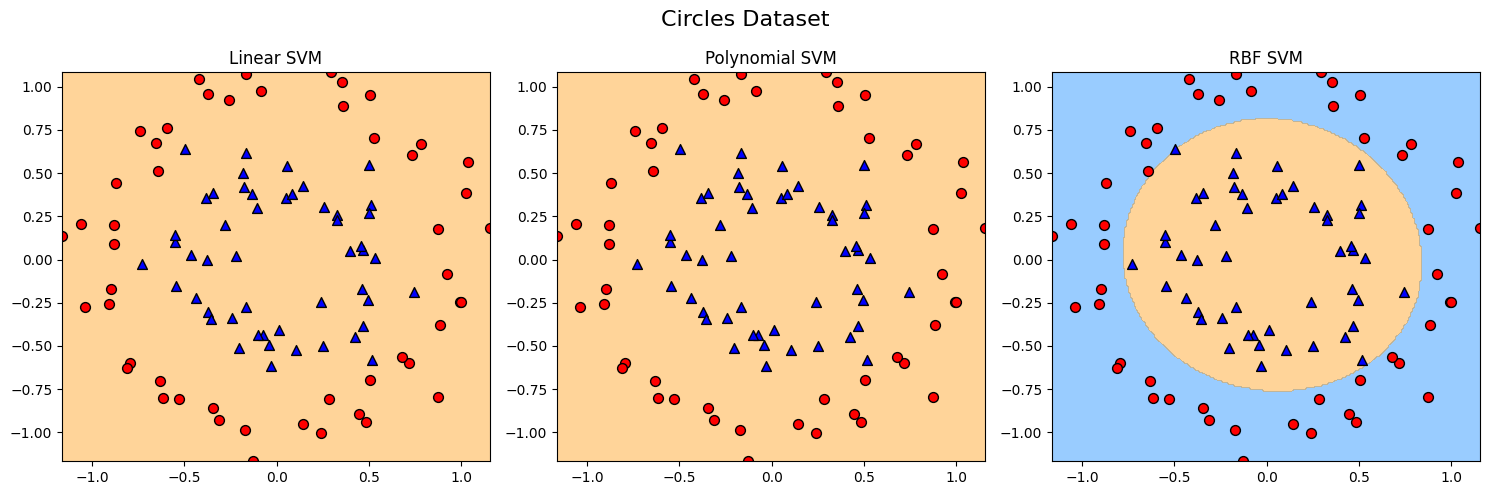

In [113]:
# Create SVM classifiers with different kernels
classifiers = {
    'Linear SVM': None, #TODO: Create an SVM with a linear kernel
    'Polynomial SVM': None, #TODO: Create an SVM with a polynomial kernel
    'RBF SVM': None, #TODO: Create an SVM with an RBF kernel
}

# Generate and fit to make_moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=42)
fit_and_plot(X_moons, y_moons, "Moons", classifiers)

# Generate and fit to make_circles dataset
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
fit_and_plot(X_circles, y_circles, "Circles", classifiers)

In the homework so far we've done only binary classification, picking between two classes. However if you remember back to the iris dataset, that had three classes we had to decide from (which we did using Naive Bayes). An SVM can also be used for multiclass classification using a "One vs. Rest" (ovr) technique. In OvR, the SVM builds n binary classifiers, where n is the number of classes in the dataset. Each classifier is trained to distinguish one class from the rest. For class i, the classifier considers samples belonging to class i as the positive class, and all other samples as the negative class.

Decision Function in OvR:

When using the OvR strategy, the decision function for an input sample returns a score for each binary classifier. These scores represent how confidently each binary classifier thinks the sample belongs to its corresponding class.

* If there are  n  classes, the decision function outputs an array of  n  scores, one for each class.
* These scores are typically signed distances from the sample to the decision hyperplane for each classifier (positive values indicate the sample is classified as belonging to the class, and negative values suggest otherwise).
* The class with the highest score is chosen as the predicted class.

**3.) In the code below, create three SVMs, one for each of the three kernels above, and set them to use "ovr" for their decision boundary.**

Linear SVM Accuracy on Multiclass Classification: 0.89
RBF SVM Accuracy on Multiclass Classification: 0.92
Polynomial SVM Accuracy on Multiclass Classification: 0.91


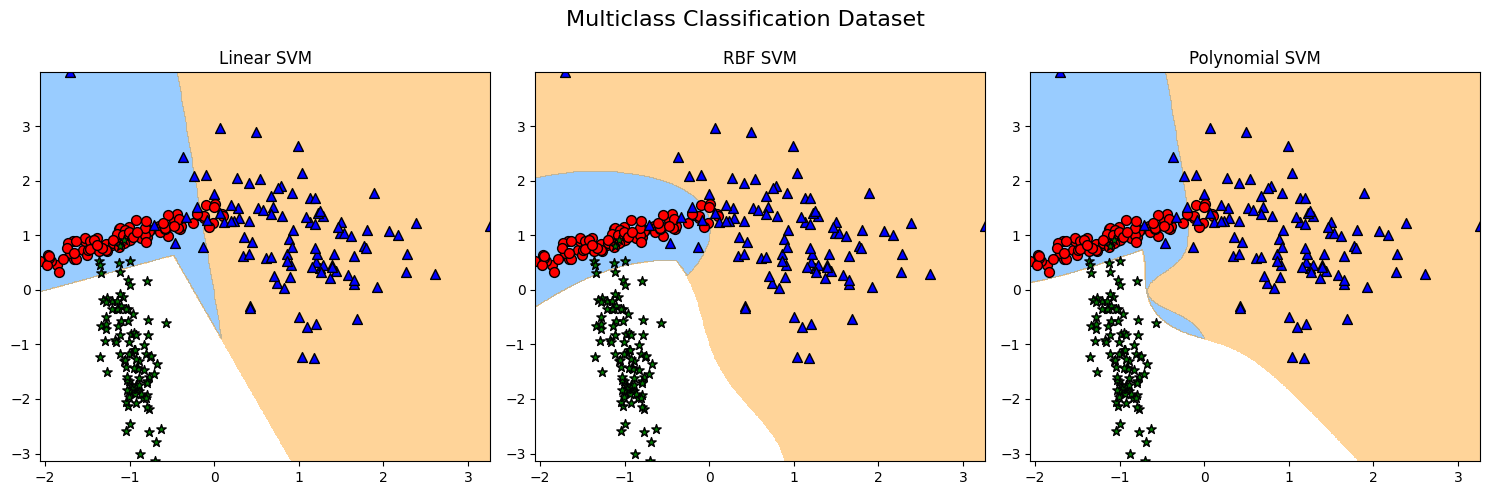

In [114]:
# Create SVM classifiers with different kernels
classifiers = {
    'Linear SVM': None, #TODO: Create an SVM with a linear kernel and an ovr decision function shape
    'RBF SVM': None, #TODO: Create an SVM with a polynomial kernel and an ovr decision function shape
    'Polynomial SVM': None #TODO: Create an SVM with an RBF kernel and an ovr decision function shape
}

# Generate multiclass dataset using make_classification
X_multiclass, y_multiclass = make_classification(n_samples=300, n_features=2, 
                                                 n_informative=2, n_redundant=0, 
                                                 n_clusters_per_class=1, n_classes=3,
                                                 random_state=42)

# Fit and plot the classifiers for the multiclass dataset
fit_and_plot(X_multiclass, y_multiclass, "Multiclass Classification", classifiers)

As the above code blocks show, it's really easy to create a use classifiers in python, despite all of the math in class! Next we're going to see some basic regression tasks, where instead of a class label we want to predict an actual number. We're going to explore three regression models:

1. Linear Regression
2. Support Vector Regression (takes different kernels)
3. Decision Trees

**4.) In the code below, create five regression models and then fit and predict on the dataset**

Linear Regression Mean Squared Error: 465.01
SVR (Linear) Mean Squared Error: 1108.94
SVR (Polynomial) Mean Squared Error: 9248.93
SVR (RBF Kernel) Mean Squared Error: 6371.78
Decision Tree Regressor Mean Squared Error: 770.99


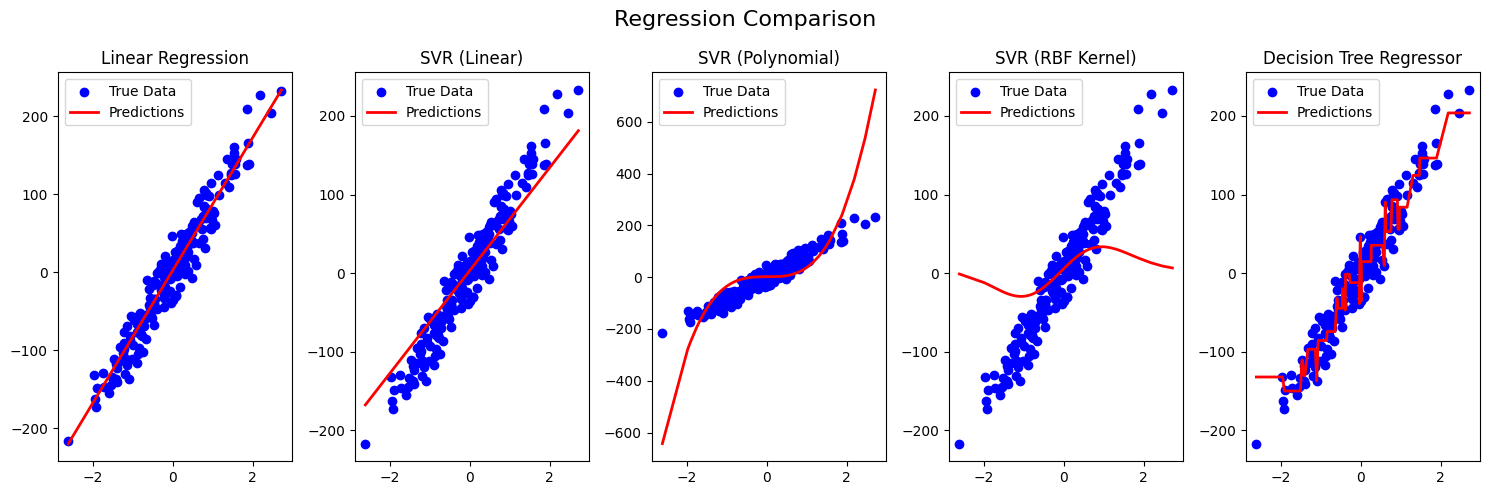

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to plot regression results
def plot_regression_results(X, y, y_pred, ax, title):
    # Sort the values for proper line plotting
    sort_idx = np.argsort(X.flatten())
    X_sorted = X[sort_idx]
    y_pred_sorted = y_pred[sort_idx]
    
    # Plot the real data points
    ax.scatter(X, y, color='blue', label='True Data')
    # Plot the predicted data as a line
    ax.plot(X_sorted, y_pred_sorted, color='red', label='Predictions', linewidth=2)
    ax.set_title(title)
    ax.legend()

# Function to fit regressors, show mean squared error, and plot results
def fit_and_plot_regressors(X, y, regressors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle('Regression Comparison', fontsize=16)
    
    for idx, (name, reg) in enumerate(regressors.items()):
        #TODO: Fit the regressor
        
        #TODO: Make predictions
        
        # Calculate mean squared error
        mse = mean_squared_error(y_test, y_pred)
        print(f'{name} Mean Squared Error: {mse:.2f}')
        
        # Predict across the full dataset for smoother plotting
        y_pred_full = reg.predict(X)
        plot_regression_results(X, y, y_pred_full, axs[idx], name)
    
    plt.tight_layout()
    plt.show()

# Create regression models
regressors = {
    'Linear Regression': None, #TODO: Create a linear regression model
    'SVR (Linear)': None, #TODO: Create an SVR model with a linear kernel
    'SVR (Polynomial)': None, #TODO: Create an SVR model with a polynomial kernel
    'SVR (RBF Kernel)': None, #TODO: Create an SVR model with an RBF kernel
    'Decision Tree Regressor': None #TODO: Create an Decision Tree model with a max_depth of 5
}

# Generate a simple regression dataset using make_regression
X_reg, y_reg = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Reshape X_reg to ensure it has the right shape for plotting
X_reg = X_reg.flatten()

# Fit and plot the regressors for the regression dataset
fit_and_plot_regressors(X_reg.reshape(-1, 1), y_reg, regressors)

Much like we don't see perfectly linearly seperable datasets in real life, it's not always the case that our regression task will have nicely linear data. Sometimes we will need to be able to handle nonlinear regression tasks!

**5.) Add your regressors to the code block below and see how well they do on data similar to a sine wave!**

Linear Regression Mean Squared Error: 0.18
SVR (Linear) Mean Squared Error: 0.17
SVR (Polynomial) Mean Squared Error: 0.08
SVR (RBF Kernel) Mean Squared Error: 0.01
Decision Tree Regressor Mean Squared Error: 0.02


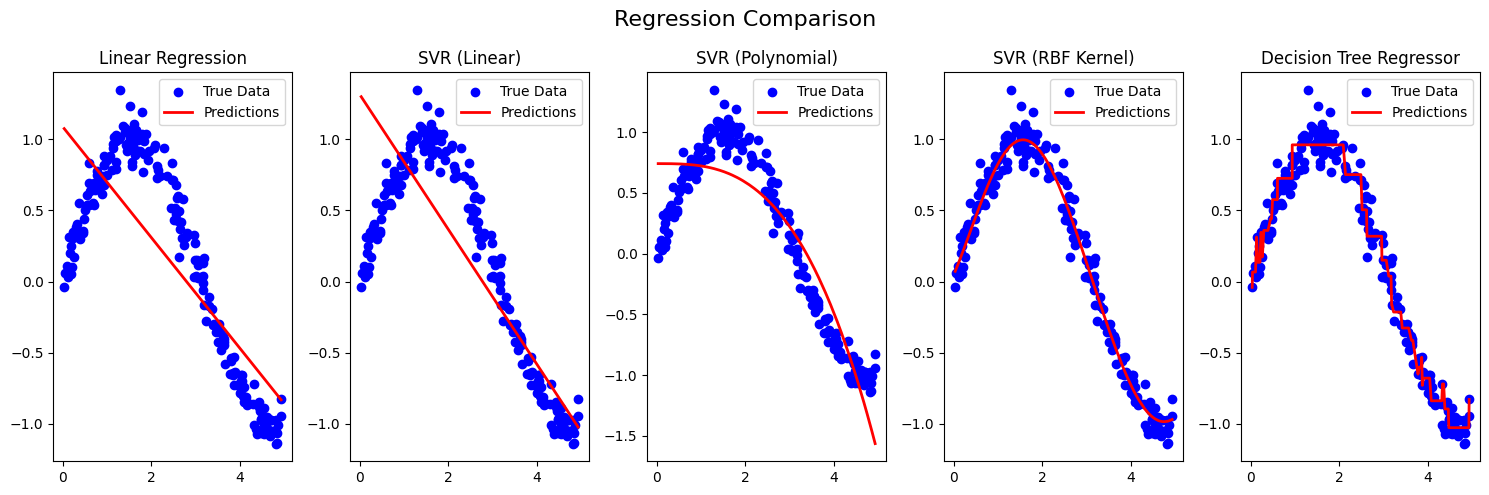

In [118]:
#TODO: Create regression models

# Generate a non-linear regression dataset (Sine Wave with noise)
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(200, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

# Fit and plot the regressors for the non-linear regression dataset
fit_and_plot_regressors(X_reg, y_reg, regressors)

Unfortunately on data like a sine wave, the linear regression doesn't work very well. However like we saw in class we can perform what's called a polynomial regression to try and achieve a better fit!

**6.) Using the PolynomialFeatures function imported below, perform a degree=3 polynomial expansion on the dataset and then use a linear classifier to see if you can get a better fit by transforming the features first!**

Mean Squared Error: 0.011425080891002738


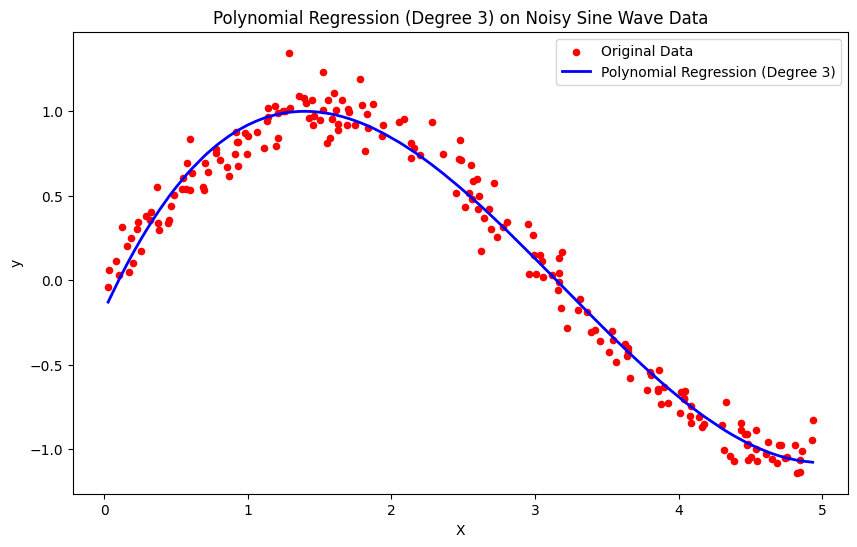

In [117]:
from sklearn.preprocessing import PolynomialFeatures

# Generate a non-linear regression dataset (Sine Wave with noise)
np.random.seed(42)
X_reg = np.sort(5 * np.random.rand(200, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

#TODO: Transform the dataset to include polynomial features of degree 3 using PolynomialFeatures and fit_transform

#TODO: Create and Fit the polynomial regression model

#TODO: Make predictions

#TODO: Calculate the mean squared error using mean_squared_error

print(f"Mean Squared Error: {mse}")

# Plot the original data and the polynomial regression model
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, color='red', label='Original Data', s=20)
plt.plot(X_reg, y_pred, color='blue', label='Polynomial Regression (Degree 3)', linewidth=2)
plt.title('Polynomial Regression (Degree 3) on Noisy Sine Wave Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()